In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0):
    """
    An ODE simulation that model time dependent variables: S, I, R, D, C
    
    N: N individuals the population has
    
    beta: a fixed number of interactions that spread the disease per day per infected individual
    
    gamma: a Poisson rate of infectiousness resolves
    
    theta: a fixed fraction of people exiting the resolving state
    
    delta: a fixed fraction of the resolved consequences being died per day
    
    T: simulation time period
    
    I0: Initial number of infectious and unquarantined individuals
    
    """
    def f(t, v):
        
        """
        v = [S, I, R, D, C]
        
        """
        dSdt = - (beta * v[0] * v[1]) / N
        dIdt = (beta * v[0] * v[1]) / N - gamma * v[1]
        dRdt = gamma * v[1] - theta * v[2]
        dDdt = delta * theta * v[2]
        dCdt = (1 - delta) * theta * v[2]
        return [dSdt, dIdt, dRdt, dDdt, dCdt]
    
    def equil_state(t, v):
        return (beta * v[0] * v[1]) / N - 0.0001
    
    v0 = [(N-I0), I0, 0, 0, 0]
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval, events=equil_state)
    return sol

In [2]:
beta_list = [0.8, 1.5, 8]
gamma_list = [0.2, 0.5, 0.6]
delta_list = [0.1, 0.2, 0.3]
theta_list = [0.01, 0.1, 0.5]

N = 10000
T = 100
I0 = 10

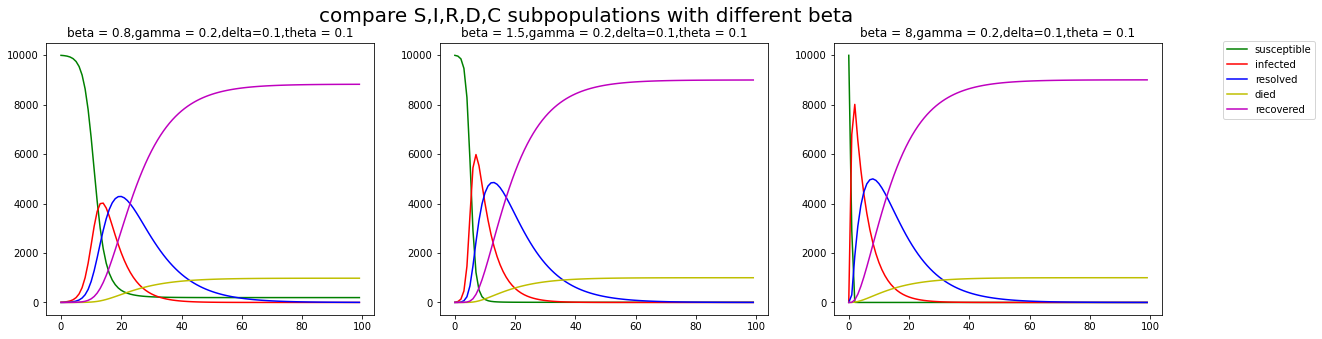

In [3]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different beta", fontsize=20)

equil_state_list = []
for i,beta in enumerate(beta_list):
    gamma = gamma_list[0]
    delta = delta_list[0]
    theta = theta_list[1]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta_list[i]},gamma = {gamma},delta={delta},theta = {theta}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [4]:
for i in range(3):
    print('For beta =', beta_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For beta = 0.8 , on Day 90 , number of susceptibles stays constant at 196 , with number of infected to be 0 , number of resolved to be 8 , number of died to be 979 and number of recovered to be 8817
For beta = 1.5 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 63 , number of died to be 993 and number of recovered to be 8939
For beta = 8 , on Day 5 , number of susceptibles stays constant at 0 , with number of infected to be 4396 , number of resolved to be 4464 , number of died to be 113 and number of recovered to be 1027


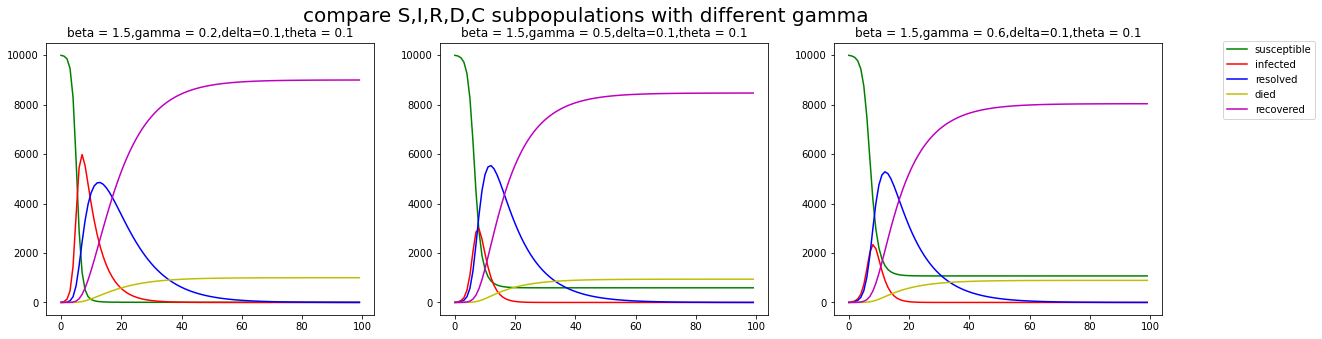

In [5]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different gamma", fontsize=20)

equil_state_list = []
for i,gamma in enumerate(gamma_list):
    beta = beta_list[1]
    delta = delta_list[0]
    theta = theta_list[1]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta},gamma = {gamma_list[i]},delta={delta},theta = {theta}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [6]:
for i in range(3):
    print('For gamma =', gamma_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For gamma = 0.2 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 63 , number of died to be 993 and number of recovered to be 8939
For gamma = 0.5 , on Day 46 , number of susceptibles stays constant at 591 , with number of infected to be 0 , number of resolved to be 241 , number of died to be 916 and number of recovered to be 8252
For gamma = 0.6 , on Day 45 , number of susceptibles stays constant at 1072 , with number of infected to be 0 , number of resolved to be 258 , number of died to be 866 and number of recovered to be 7804


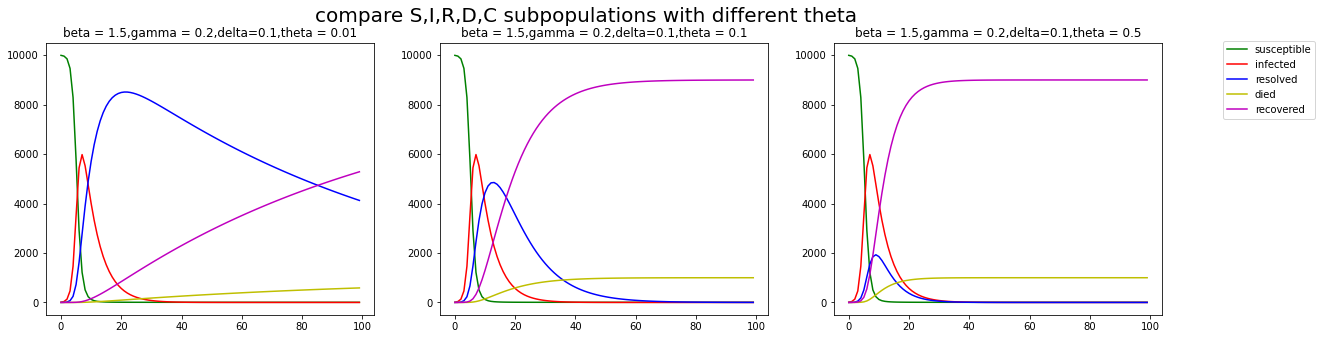

In [7]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different theta", fontsize=20)

equil_state_list = []
for i,theta in enumerate(theta_list):
    beta = beta_list[1]
    delta = delta_list[0]
    gamma = gamma_list[0]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta},gamma = {gamma},delta={delta},theta = {theta_list[i]}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [8]:
for i in range(3):
    print('For theta =', theta_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For theta = 0.01 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 5911 , number of died to be 408 and number of recovered to be 3676
For theta = 0.1 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 63 , number of died to be 993 and number of recovered to be 8939
For theta = 0.5 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 0 , number of died to be 999 and number of recovered to be 8996


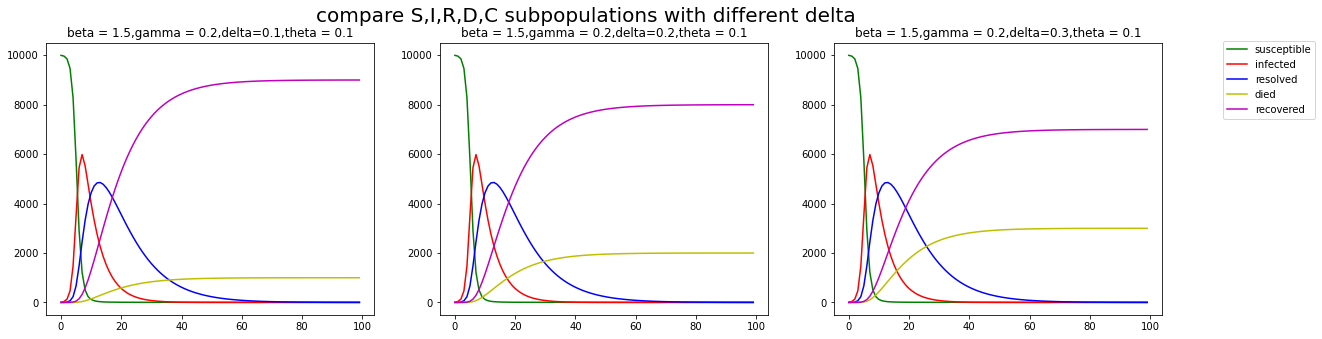

In [9]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different delta", fontsize=20)

equil_state_list = []
for i,delta in enumerate(delta_list):
    beta = beta_list[1]
    theta = theta_list[1]
    gamma = gamma_list[0]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta},gamma = {gamma},delta={delta_list[i]},theta = {theta}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [10]:
for i in range(3):
    print('For theta =', theta_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For theta = 0.01 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 63 , number of died to be 993 and number of recovered to be 8939
For theta = 0.1 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 63 , number of died to be 1986 and number of recovered to be 7946
For theta = 0.5 , on Day 63 , number of susceptibles stays constant at 5 , with number of infected to be 0 , number of resolved to be 63 , number of died to be 2979 and number of recovered to be 6953


Suppose now $\beta_t$ is a time-varying variable. If policies that can decrease the chances of interactions between people, like social distancing, are practiced, $\beta_t$ would be deminishing through time until slightly fluctuates around some constant number.

In [11]:
def SIRDC_ODE_simulation(N,gamma,theta,delta,T,I0):
    """
    An ODE simulation that model time dependent variables: S, I, R, D, C
    
    N: N individuals the population has
    
    beta: a fixed number of interactions that spread the disease per day per infected individual
    
    gamma: a Poisson rate of infectiousness resolves
    
    theta: a fixed fraction of people exiting the resolving state
    
    delta: a fixed fraction of the resolved consequences being died per day
    
    T: simulation time period
    
    I0: Initial number of infectious and unquarantined individuals
    
    """
    def f(t, v):
        
        """
        v = [S, I, R, D, C]
        
        """
        dbdt = - np.exp(- N/v[1] - N*0.2/v[0]) 
        dSdt = - (beta * v[0] * v[1]) / N
        dIdt = (beta * v[0] * v[1]) / N - gamma * v[1]
        dRdt = gamma * v[1] - theta * v[2]
        dDdt = delta * theta * v[2]
        dCdt = (1 - delta) * theta * v[2]
        return [dSdt, dIdt, dRdt, dDdt, dCdt, dbdt]
    
    v0 = [(N-I0), I0, 0, 0, 0, 0.6]
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval)
    return sol

<ipython-input-11-47a8cb71a2f7>:26: RuntimeWarning: overflow encountered in exp
  dbdt = - np.exp(- N/v[1] - N*0.2/v[0])
/opt/anaconda3/envs/pycourse/lib/python3.8/site-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in true_divide
  return norm(self._estimate_error(K, h) / scale)


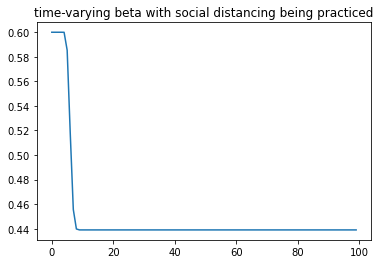

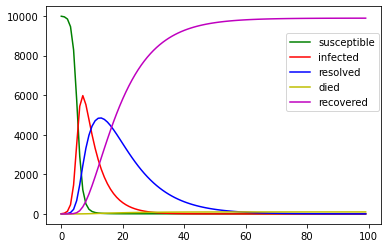

In [12]:
delta = 0.01
theta = 0.1
gamma = 0.2
T = 100

sol = SIRDC_ODE_simulation(N,gamma,theta,delta,T,I0)
plt.plot(sol.t, sol.y[5])
plt.title('time-varying beta with social distancing being practiced')
plt.show()
plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
plt.plot(sol.t, sol.y[1], label="infected", c='r')
plt.plot(sol.t, sol.y[2], label="resolved", c='b')
plt.plot(sol.t, sol.y[3], label="died", c='y')
plt.plot(sol.t, sol.y[4], label="recovered", c='m')
plt.legend(bbox_to_anchor=(1.01, 0.9), loc = 'upper right')